
Date: 01/07/2025

Developed by: Sam Jeffery

For more information on this project please refer to the README.md file on the GitHub repository.

You may run this ipynb file if you would like to view the charts in my analysis!

From the dataset on Kaggle, there are a few questions that are imposed that are interesting and worth exploring. 
These questions will be answered as the data is explored.

    1. How does customer age and gender influence their purchasing behavior?
    2. Are there discernible patterns in sales across different time periods?
    3. Which product categories hold the highest appeal among customers?
    4. What are the relationships between age, spending, and product preferences?
    5. How do customers adapt their shopping habits during seasonal trends?
    6. Are there distinct purchasing behaviors based on the number of items bought per transaction?
    7. What insights can be gleaned from the distribution of product prices within each category? 

In [39]:
# Importing basic data handling libraries.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df = pd.read_csv(r"retail_sales_dataset.csv")




Now, we need to investigate the data and see what has to be done.



In [40]:
df.shape

(1000, 9)

In [41]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [42]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64



The data pulled from Kaggle is luckily pretty clean. Will just need to standardize column names.

We also need to check out the data types and standardize those as well.


In [43]:
# Remove spaces and put all columns to lowercase.

df.columns = df.columns.str.lower().str.replace(' ', '_')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   transaction_id    1000 non-null   int64 
 1   date              1000 non-null   object
 2   customer_id       1000 non-null   object
 3   gender            1000 non-null   object
 4   age               1000 non-null   int64 
 5   product_category  1000 non-null   object
 6   quantity          1000 non-null   int64 
 7   price_per_unit    1000 non-null   int64 
 8   total_amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB




After reviewing the datatypes, we identify which are categorical, and which are numeric.

Numeric:

age, customer ID, quantity, price per unit, total amount

Categorical:

gender, product_category

We will need to also clean our data types, and set gender and product category to 'category' variables so that pandas will recognize them.




In [45]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df['gender'] = df['gender'].astype('category')
df['product_category'] = df['product_category'].astype('category')


# Transaction ID isn't really important.
df.drop('transaction_id', axis=1, inplace=True)

df.describe()

,age,quantity,price_per_unit,total_amount
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,41.39200,2.514000,179.890000,456.000000
std,13.68143,1.132734,189.681356,559.997632
min,18.00000,1.000000,25.000000,25.000000
25%,29.00000,1.000000,30.000000,60.000000
50%,42.00000,3.000000,50.000000,135.000000
75%,53.00000,4.000000,300.000000,900.000000
max,64.00000,4.000000,500.000000,2000.000000



Above, we can see some basic summary statistics.

It looks like our age bracket is from 18-64.

Our quantity will be from 1-4

Our Price per unit seems to be set values of 25, 30, 50, 300, and 500.

And the total amount should range of values.

Now that our data is standardized, we can begin performing our Univariate Analysis.



<Axes: ylabel='count'>

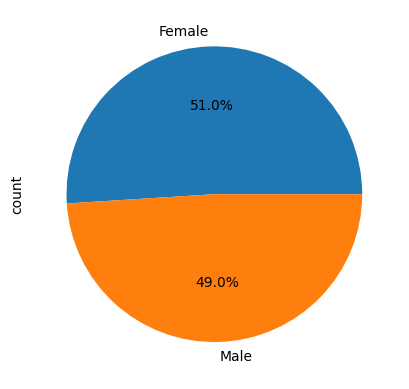

In [52]:
df['gender'].value_counts()
df['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')


The graph above shows that 51% of the customers are female, with 49% customers being male. 

This answers part of question 1. More customers are female than males.

In [53]:
df['age'].describe()

count    1000.00000
mean       41.39200
std        13.68143
min        18.00000
25%        29.00000
50%        42.00000
75%        53.00000
max        64.00000
Name: age, dtype: float64

Since we investigated the gender variable, let us also explore the age variable. 

We can see that our range is from 18 to 24, with a mean of 41, and a standard deviation of 13 years.

This means that on average, customers of a higher age are spending more money.

<Axes: ylabel='Frequency'>

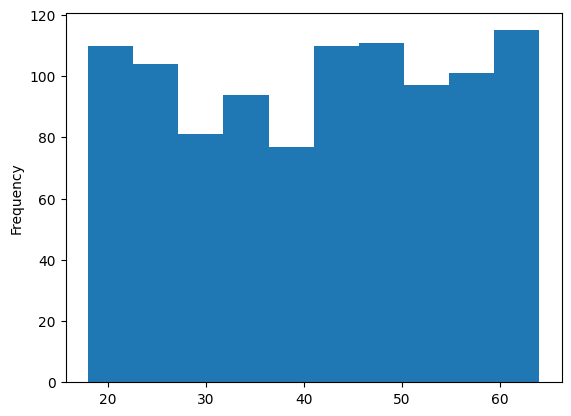

In [59]:
df['age'].skew()

df['age'].plot(kind='hist')

Our skew for age is very close to 0, meaning the data is roughly symmetric, which we can verify by looking at a graph.

In [60]:
df['product_category'].value_counts()

product_category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

The most popular category is clothing, with Electronics following closely behind.

Lets also graph this.


(array([0, 1, 2]),
 [Text(0, 0, 'Clothing'), Text(1, 0, 'Electronics'), Text(2, 0, 'Beauty')])

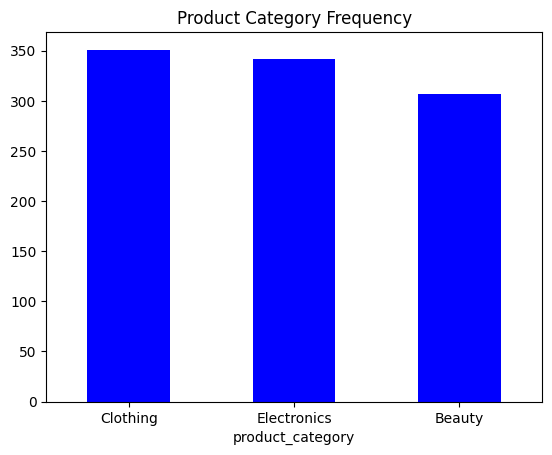

In [61]:
df['product_category'].value_counts().plot(kind='bar', color='blue')
plt.title("Product Category Frequency")
plt.xticks(rotation = 0)

In [62]:
df['quantity'].describe()

count    1000.000000
mean        2.514000
std         1.132734
min         1.000000
25%         1.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: quantity, dtype: float64

Text(0.5, 1.0, 'Frequency of Quantity')

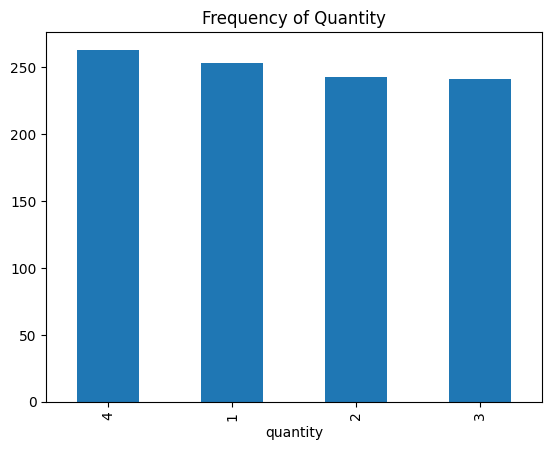

In [64]:
# We know that quantity will be from 1 to 4, so lets get counts.

df['quantity'].value_counts().plot(kind='bar')
plt.title('Frequency of Quantity')


In [65]:
df['price_per_unit'].describe()


count    1000.000000
mean      179.890000
std       189.681356
min        25.000000
25%        30.000000
50%        50.000000
75%       300.000000
max       500.000000
Name: price_per_unit, dtype: float64

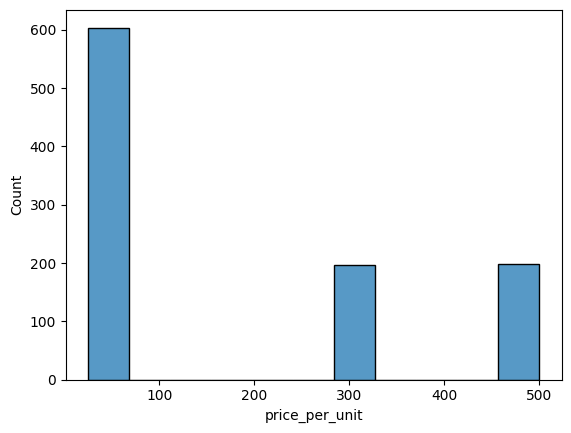

In [68]:
plot = sns.histplot(df, x='price_per_unit')


Text(0.5, 1.0, 'Total Amount')

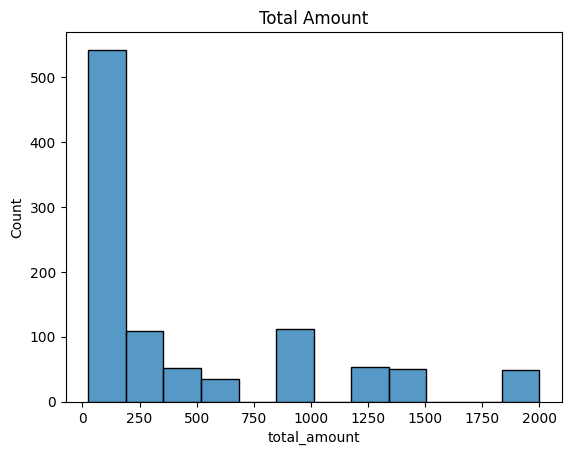

In [70]:
df['total_amount'].describe()

sns.histplot(df['total_amount'])
plt.title('Total Amount')

We've finished all of the variables and a basic Univariate Analysis. Let's Circle back and make some inferences based on the questions that were supplied.


    1. How does customer age and gender influence their purchasing behavior?

From our analysis, older patients are more frequently shopping. Female also make up a slightly higher percentage, but gender is almost uniform.

    3. Which product categories hold the highest appeal among customers?

The most frequently purchased product categories are Clothing > Electronics > Beauty

    6. Are there distinct purchasing behaviors based on the number of items bought per transaction?
The rankings of items bought are 4 > 1 > 2 > 3. This means that customers are more frequently buying in bulk or individiually, and not really buying in the mid-range.


# Now time to move on to Bivariate Analysis!

Part 1: Numeric vs Numeric

Our Numeric Variables are:

age, customer ID, quantity, price per unit, total amount

Customer ID won't really be used, since it is just an identifier and not to be used for analysis, unless we want to see who are most frequent customer is!


Text(0.5, 1.0, 'Age vs Total Amount')

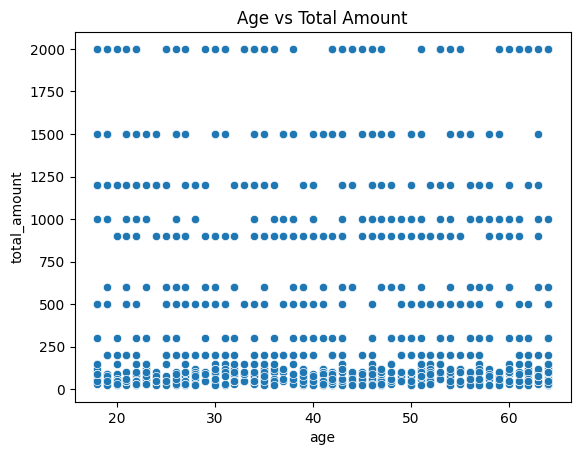

In [71]:
sns.scatterplot(df, x='age', y='total_amount')
plt.title('Age vs Total Amount')

In [72]:
df['age'].corr(df['total_amount'])


np.float64(-0.060568023883045656)

A weak negative linear correlation. Let's explore age and total amount further.

In [73]:
df['age'].corr(df['total_amount'],method='spearman')

np.float64(-0.037864028718041294)

In [74]:
df['price_per_unit'].corr(df['total_amount'])

np.float64(0.8519248403554038)

We have a strong positive linear correlation with price per unit and the total amount spent, which is to be expected. Lets verify with a graph.

Text(0.5, 1.0, 'PPU vs total amount')

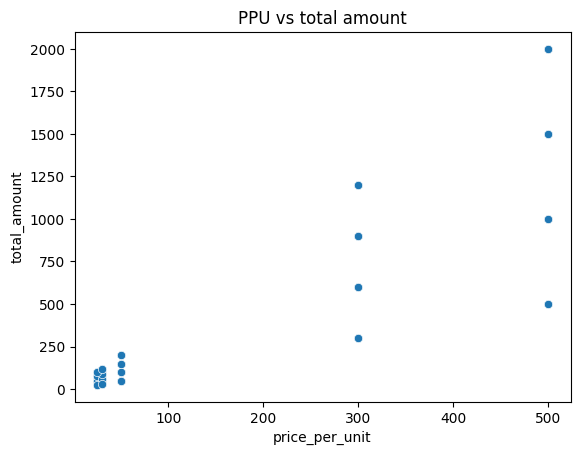

In [76]:
sns.scatterplot(df, x='price_per_unit', y='total_amount')
plt.title("PPU vs total amount")

Let's check out quantity and total amount.

And hey, look at that! It has a positive correlation.



In [77]:
df['quantity'].corr(df['total_amount'])

np.float64(0.37370705412140603)

<Axes: xlabel='quantity', ylabel='total_amount'>

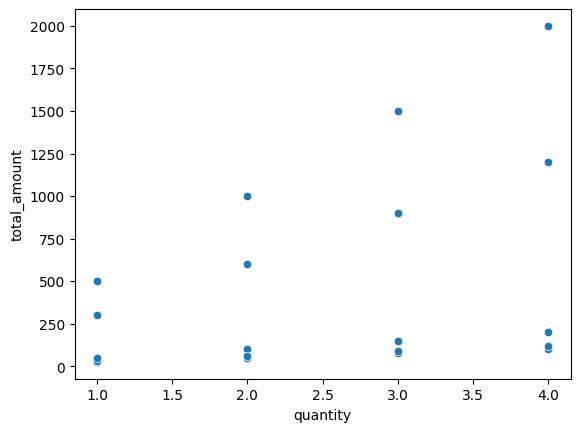

In [78]:
sns.scatterplot(df, x='quantity', y='total_amount')

Worth exploring, but the customer IDs are all unique, so they won't really serve in our analysis.

In [79]:
df.value_counts('customer_id')

customer_id
CUST999    1
CUST001    1
CUST002    1
CUST003    1
CUST004    1
          ..
CUST013    1
CUST012    1
CUST011    1
CUST010    1
CUST009    1
Name: count, Length: 1000, dtype: int64

<Axes: xlabel='price_per_unit', ylabel='age'>

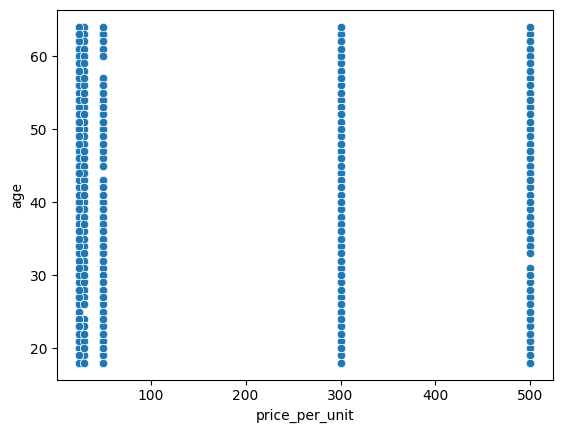

# Categoric vs Categoric

In [85]:
pd.crosstab(df['gender'], df['product_category'])

product_category,Beauty,Clothing,Electronics
gender,,,
Female,166,174,170
Male,141,177,172


We can see that both Male and Female frequently purchase clothing.

They also both have a minimum frequency of purchasing Beauty items.

The distribution is still pretty even.

In [86]:
pd.crosstab(df['gender'], df['quantity'])

quantity,1,2,3,4
gender,,,,
Female,125,120,127,138
Male,128,123,114,125


From this analysis, Females more frequently by in bulk quantity (4), and men most frequently buy in low quantity. Each is pretty even, again.

In [87]:
pd.crosstab(df['product_category'], df['quantity'])

quantity,1,2,3,4
product_category,,,,
Beauty,74,75,85,73
Clothing,88,80,86,97
Electronics,91,88,70,93


Clothing is most frequently bought at a high quantity. Electronics is most frequently bought at a low quantity. Beauty is the least bought item.

In [88]:
pd.crosstab(df['gender'], df['price_per_unit'])

price_per_unit,25,30,50,300,500
gender,,,,,
Female,115,92,98,106,99
Male,95,91,113,91,100


Both genders show a balanced variety.

Females most fequently buy items in the 25 and 300 range. Men perform better in the 50 range.

Both are very close in 30 and 500.

# Numeric Vs Categorical

C:\Users\njhdt\AppData\Local\Temp\ipykernel_9080\2444242179.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df, x='gender', y='total_amount', palette=my_pal)


Text(0.5, 1.0, 'Gender vs Total Amount')

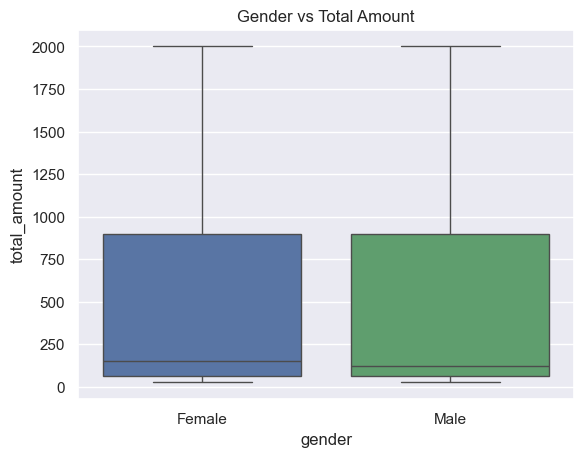

In [89]:
sns.set_theme(style="darkgrid")
my_pal = {"Male": "g", "Female": "b"}
sns.boxplot(df, x='gender', y='total_amount', palette=my_pal)
plt.title("Gender vs Total Amount")


C:\Users\njhdt\AppData\Local\Temp\ipykernel_9080\1408866172.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df, x='product_category', y='total_amount', palette=my_pal)


Text(0.5, 1.0, 'Product Category vs Total Amount')

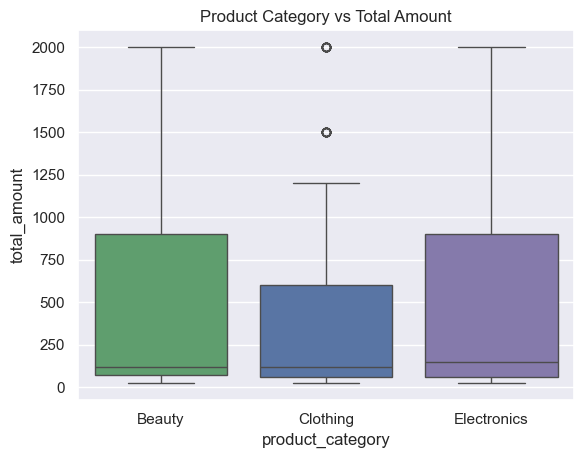

In [95]:
my_pal = {"Beauty": "g", "Clothing": "b", "Electronics":"m"}
sns.boxplot(df, x='product_category', y='total_amount', palette=my_pal)
plt.title("Product Category vs Total Amount")

C:\Users\njhdt\AppData\Local\Temp\ipykernel_9080\1401612590.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df, x='product_category', y='age', palette=my_pal)


Text(0.5, 1.0, 'Product Category vs Age')

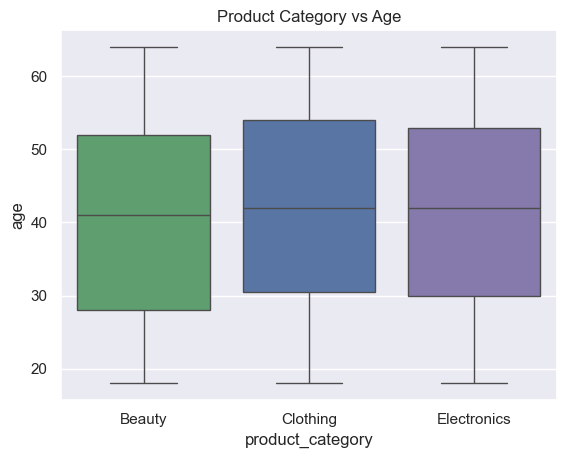

In [99]:
sns.boxplot(df, x='product_category', y='age', palette=my_pal)
plt.title("Product Category vs Age")

# This is the end of Bivariate.

Let's circle back to our questions again.


 
    4. What are the relationships between age, spending, and product preferences?
Customers at a higher age are frequeetly purchasing more clothes and electronics. There are no outliers in age.  Much less is spent on clothing than anything else, with a few outliers for expensive products.
    
    7. What insights can be gleaned from the distribution of product prices within each category? 

Clothing has some outliers with prices, with some outliers on the high end.

The other distributions look pretty standard, with each performing pretty well.



# Multivariate Analysis

<Axes: xlabel='product_category', ylabel='total_amount'>

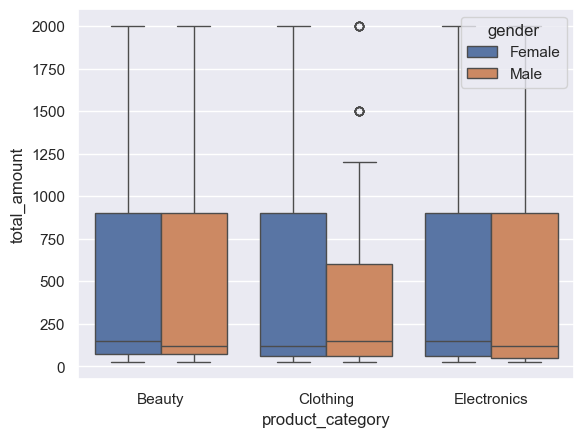

In [103]:
sns.boxplot(df, x='product_category', y='total_amount', hue='gender')

Spending in Beauty in Electronics is pretty consistent.

Females spend more on average on clothes than men do.

There are a few men with unique spending habits.

<Axes: xlabel='price_per_unit', ylabel='total_amount'>

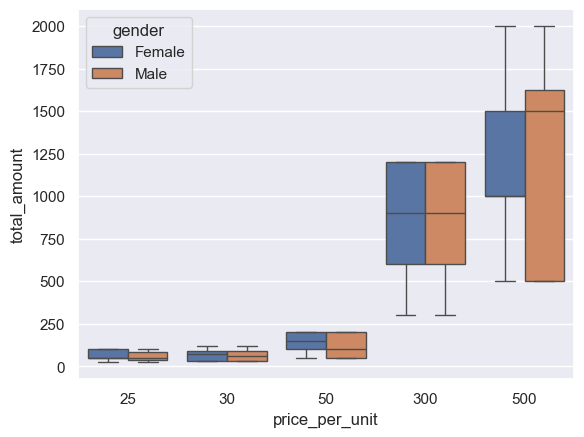

In [104]:
sns.boxplot(df, x='price_per_unit', y='total_amount', hue='gender')

There are more men buying higher priced items than women.

At the lower values and 300, they are pretty similar.

# Time Series

C:\Users\njhdt\AppData\Local\Temp\ipykernel_9080\272362332.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df['total_amount'].resample('M').mean()


<Axes: xlabel='date'>

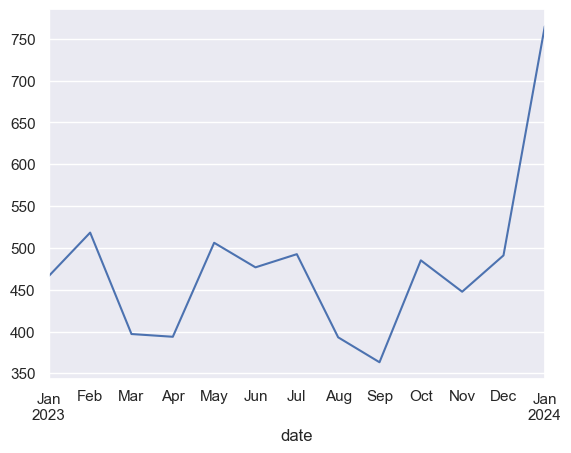

In [105]:
monthly = df['total_amount'].resample('M').mean()
monthly.plot()

Spending is up in Feb, and returns back in May. In the Fall, it dips again, with sales spiking again at the end of the year.

C:\Users\njhdt\AppData\Local\Temp\ipykernel_9080\3960378129.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly = df['total_amount'].resample('Q').mean()


<Axes: xlabel='date'>

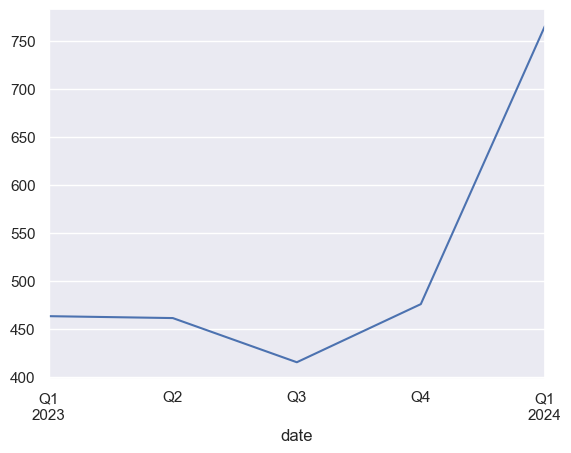

In [106]:
quarterly = df['total_amount'].resample('Q').mean()
quarterly.plot()

Splitting it into quarters, we can see the trouble area is around Q3.

# The End!

    2. Are there discernible patterns in sales across different time periods?

Sales seem to dipduring Q3, and spike at the end of Q4 in to Q1. This could be why sales are mostly flat from Q1 to Q3.
    4. What are the relationships between age, spending, and product preferences?
Customers at a higher age are frequeetly purchasing more clothes and electronics. There are no outliers in age.  Much less is spent on clothing than anything else, with a few outliers for expensive products.

    5. How do customers adapt their shopping habits during seasonal trends?
Customers seem to shop in large amounts at the end of Q4, and steadily throughout Q1 and 2.